In [1]:
import numpy as np
import numpy.linalg as la

from scipy.stats import chi2

import matplotlib.pyplot as plt

In [2]:
mu = np.array([10., 5.])

In [3]:
P = np.array([[2.0, 0.5], [0.5, 1.0]])
print(P)

[[2.  0.5]
 [0.5 1. ]]


In [4]:
la.eigvals(P)

array([2.20710678, 0.79289322])

In [5]:
L = la.cholesky(P)

In [6]:
L

array([[1.41421356, 0.        ],
       [0.35355339, 0.93541435]])

In [7]:
np.allclose(L @ L.T, P)

True

In [8]:
u, d, vh = la.svd(L)

In [9]:
u1 = u[:,0]
u2 = u[:,1]
d1 = d[0]
d2 = d[1]
v1 = vh[0]
v2 = vh[1]

In [10]:
np.allclose(d1 * np.outer(u1, v1) + d2 * np.outer(u2, v2), L)

True

In [11]:
u1

array([-0.92387953, -0.38268343])

In [12]:
u2

array([-0.38268343,  0.92387953])

In [13]:
d1

1.4856334612503002

In [14]:
d2

0.8904455170382143

In [15]:
u2

array([-0.38268343,  0.92387953])

In [16]:
v2

array([-0.24095282,  0.97053683])

In [17]:
X = np.random.multivariate_normal(mu, P, size=10000)

In [18]:
X.shape

(10000, 2)

(0.0, 10.0)

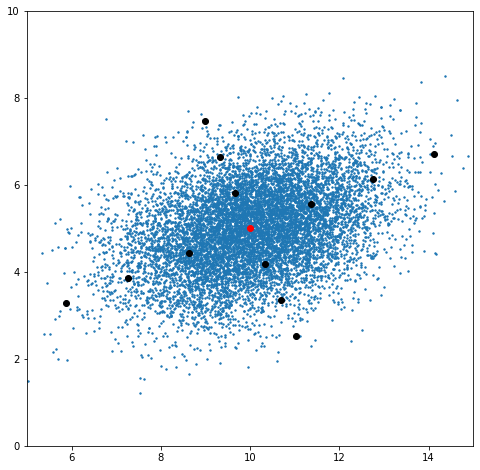

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], s=2)

plt.scatter(mu[0], mu[1], c="r")

for i in [-3,-2,-1,1,2,3]:
    p1 = mu + i*d1*u1
    plt.scatter(p1[0], p1[1], c="k")

for i in [-3,-2,-1,1,2,3]:
    p2 = mu + i*d2*u2
    plt.scatter(p2[0], p2[1], c="k")

plt.xlim(5, 15)
plt.ylim(0, 10)

In [20]:
c2 = chi2.ppf(0.95, df=2)
t = np.linspace(0, 2*np.pi, 50)
alpha_1 = np.sqrt(c2) * np.cos(t)
alpha_2 = np.sqrt(c2) * np.sin(t)
x_c = mu[None, :] + d1 * alpha_1[:, None] * u1[None, :] + d2 * alpha_2[:, None] * u2[None, :]

In [21]:
x_c.shape

(50, 2)

(0.0, 10.0)

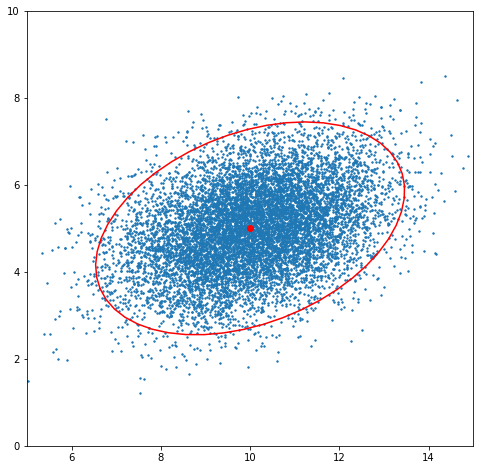

In [23]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], s=2)
plt.plot(x_c[:,0], x_c[:,1], c="r")

plt.scatter(mu[0], mu[1], c="r")

plt.xlim(5, 15)
plt.ylim(0, 10)